# Glass Type Classification

## Introduction

In this worksheet, we will consider a classification problem for Glass Indentication. The Glass Identification Data Set from UCI. It contains 9 attributes including, Refractive index and the percentage of various elements in the composition. The response type is glass type, 7 discrete values. E.g., building windows, vehicle windows, containers, tableware etc.

The dataset was downloaded from: https://www.kaggle.com/uciml/glass/home

In [3]:
import pandas as pd
import numpy as np
import gc # garbage collection
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline
path = ("/Users/balaji/Downloads/glass.csv/")
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
from sklearn import preprocessing
df_values = df.iloc[:, :9]
float_array = df_values.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_dataset = min_max_scaler.fit_transform(float_array)

In [5]:
dataset = np.array(df)
# X2 = dataset[:,0:9]
X2 = scaled_dataset
y2 = dataset[:,9]

In [6]:
X = X2.astype(np.float)
y = y2.astype(np.int)
X

array([[ 0.43283582,  0.43759398,  1.        , ...,  0.30855019,
         0.        ,  0.        ],
       [ 0.28358209,  0.47518797,  0.80178174, ...,  0.22304833,
         0.        ,  0.        ],
       [ 0.22080773,  0.42105263,  0.79064588, ...,  0.21840149,
         0.        ,  0.        ],
       ..., 
       [ 0.41703248,  0.54586466,  0.        , ...,  0.27973978,
         0.52063492,  0.        ],
       [ 0.23529412,  0.54887218,  0.        , ...,  0.28345725,
         0.4984127 ,  0.        ],
       [ 0.26163301,  0.52631579,  0.        , ...,  0.2964684 ,
         0.53015873,  0.        ]])

In [7]:
X_header=["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]
df = pd.DataFrame(X,columns=X_header) # Get all X data
df["Type"] = y #

In [8]:
import numpy as np
covariant_matrix = np.cov(X.T)
print(covariant_matrix)

[[  1.77722811e-02  -3.14125427e-03  -5.23657804e-03  -8.44586014e-03
   -9.99474621e-03  -4.05791317e-03   1.42893322e-02  -8.12302067e-06
    3.64248787e-03]
 [ -3.14125427e-03   1.50792327e-02  -1.07983367e-02   2.99466516e-03
   -1.18565656e-03  -3.43159664e-03  -4.47362957e-03   6.33063129e-03
   -5.66228565e-03]
 [ -5.23657804e-03  -1.07983367e-02   1.03200896e-01  -2.40733936e-02
   -7.37254009e-03   1.82041607e-04  -1.88546987e-02  -2.49617794e-02
    5.09791402e-03]
 [ -8.44586014e-03   2.99466516e-03  -2.40733936e-02   2.41913587e-02
   -1.18828576e-04   5.32446692e-03  -5.34024180e-03   1.17698000e-02
   -2.21093986e-03]
 [ -9.99474621e-03  -1.18565656e-03  -7.37254009e-03  -1.18828576e-04
    1.91301399e-02  -2.80830328e-03  -3.81845694e-03  -2.23018251e-03
   -2.48928517e-03]
 [ -4.05791317e-03  -3.43159664e-03   1.82041607e-04   5.32446692e-03
   -2.80830328e-03   1.10297972e-02  -4.41495755e-03  -7.06504323e-04
   -1.54884828e-04]
 [  1.42893322e-02  -4.47362957e-03  -1.

In [9]:
eigen_values,eigen_vectors = np.linalg.eig(covariant_matrix)

In [10]:
print(eigen_vectors)

[[-0.03420952  0.51327262  0.23131525 -0.28691555  0.76227326 -0.03033651
   0.04068834 -0.1259659  -0.00706248]
 [-0.11044243 -0.19867029  0.08910698 -0.20013534  0.15766763  0.3884908
  -0.05013896  0.65388919  0.54265017]
 [ 0.90903503 -0.11710045 -0.02972865 -0.19100828  0.03693416  0.27396402
   0.15619375 -0.13842858  0.05094571]
 [-0.24901968 -0.34736315 -0.34427771 -0.19473353  0.22875895  0.18784949
   0.65596854  0.03563783 -0.37642646]
 [-0.05079549 -0.21642569 -0.00520515  0.73423641  0.38288325  0.32894209
   0.00124735 -0.32454773  0.22652653]
 [ 0.00269769 -0.12930091 -0.16635716 -0.07888519  0.17112507  0.38000561
  -0.67288061  0.10459906 -0.55855089]
 [-0.14094732  0.50234458  0.23187356  0.05806609 -0.38934113  0.66957133
   0.22101397 -0.05962385 -0.13539681]
 [-0.26682812 -0.16429176 -0.18355983 -0.48987034 -0.11295423  0.19167156
  -0.19631151 -0.63236223  0.37446892]
 [ 0.06801349  0.46883578 -0.8390357   0.12062091  0.01253248  0.01183121
  -0.03136989  0.128139

In [11]:
print(eigen_values)

[  1.22348913e-01   4.84501372e-02   3.40669665e-02   2.63871310e-02
   1.16558763e-03   3.75462930e-05   7.02857199e-03   1.13492304e-02
   1.84815091e-02]


9
[0.45429568907468537, 0.17990097302959271, 0.12649459375058836, 0.097978474655405476, 0.068623984440876043, 0.042141007248255299, 0.026097902147883122, 0.0043279619165001882, 0.00013941373621361515]


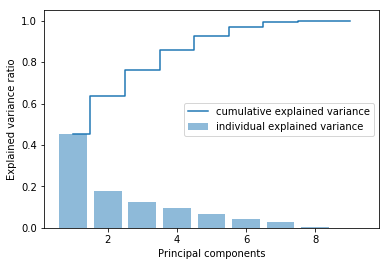

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

tot = sum(eigen_values)
var_exp = [(i/tot) for i in sorted(eigen_values,reverse=True)]
print(len(var_exp))
print(var_exp)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,10),var_exp,alpha=0.5,align='center',
         label='individual explained variance')
plt.step(range(1,10),cum_var_exp,where='mid',
    label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [14]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(X)
principalDf3 = pd.DataFrame(data = principalComponents3, \
                           columns = ['principal component 1', 
                                      'principal component 2',
                                      'principal component 3'])

In [15]:
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(X)
principalDf2 = pd.DataFrame(data = principalComponents2, \
                           columns = ['principal component 1', 
                                      'principal component 2'])

In [16]:
print("PCA 3 explained variance:", pca3.explained_variance_ratio_)
print("PCA 2 explained variance:", pca2.explained_variance_ratio_)

PCA 3 explained variance: [ 0.45429569  0.17990097  0.12649459]
PCA 2 explained variance: [ 0.45429569  0.17990097]


In [17]:
print(pca3.components_)

[[ 0.03420952  0.11044243 -0.90903503  0.24901968  0.05079549 -0.00269769
   0.14094732  0.26682812 -0.06801349]
 [ 0.51327262 -0.19867029 -0.11710045 -0.34736315 -0.21642569 -0.12930091
   0.50234458 -0.16429176  0.46883578]
 [-0.23131525 -0.08910698  0.02972865  0.34427771  0.00520515  0.16635716
  -0.23187356  0.18355983  0.8390357 ]]


In [18]:
print(pca2.components_)

[[ 0.03420952  0.11044243 -0.90903503  0.24901968  0.05079549 -0.00269769
   0.14094732  0.26682812 -0.06801349]
 [ 0.51327262 -0.19867029 -0.11710045 -0.34736315 -0.21642569 -0.12930091
   0.50234458 -0.16429176  0.46883578]]


In [19]:
print(principalDf3.head())
print(principalDf2.head())

   principal component 1  principal component 2  principal component 3
0              -0.402106               0.032707              -0.167050
1              -0.206320              -0.144705              -0.081923
2              -0.188617              -0.194854              -0.044696
3              -0.237208              -0.097064              -0.086336
4              -0.223972              -0.121779              -0.087395
   principal component 1  principal component 2
0              -0.402106               0.032707
1              -0.206320              -0.144705
2              -0.188617              -0.194854
3              -0.237208              -0.097064
4              -0.223972              -0.121779


From the cells above, it is clear that doing the transforms on the larger number of dimensions and then subsetting on fewer number of components is the same as doing PCA on smaller number of dimensions.

In [20]:
# finalDF is a data frame with three components rather than two.
# Based on the comment above, by dropping the third column 
# we can get back to two components.
finalDf = pd.concat([principalDf3, df[['Type']]], axis = 1)
print(finalDf.head())
print(finalDf.tail())

   principal component 1  principal component 2  principal component 3  Type
0              -0.402106               0.032707              -0.167050     1
1              -0.206320              -0.144705              -0.081923     1
2              -0.188617              -0.194854              -0.044696     1
3              -0.237208              -0.097064              -0.086336     1
4              -0.223972              -0.121779              -0.087395     1
     principal component 1  principal component 2  principal component 3  Type
209               0.749082              -0.233155               0.089777     7
210               0.732719              -0.225962               0.023544     7
211               0.739477              -0.141512              -0.001935     7
212               0.723704              -0.228558               0.026492     7
213               0.741011              -0.214725               0.040002     7


In [157]:
finalDf['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


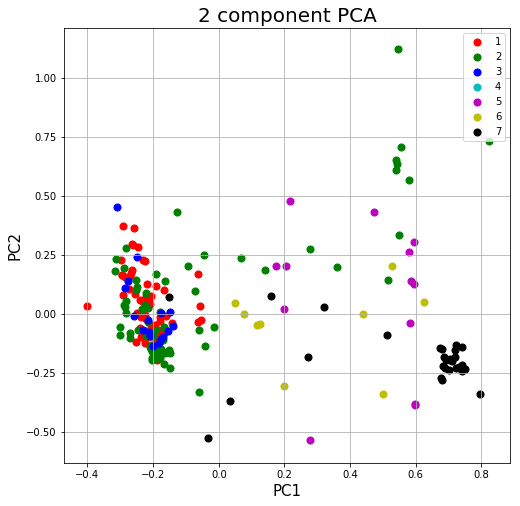

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4, 5, 6, 7]
colors = ['r','g', 'b', 'c', 'm', 'y', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

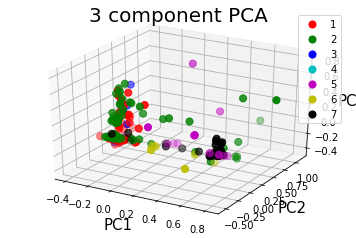

In [23]:
fig = plt.figure()#figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_zlabel('PC3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [1, 2, 3, 4, 5, 6, 7]
colors = ['r','g', 'b', 'c', 'm', 'y', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

From the diagrams above, going to three dimensions seems to be have better clustering for certain labels.  However, three dimensions is still not very accurate clustering for certain labels. Eg., Label 4 and 5.

## Classification prediction using the original datasets and the PCA components

We will run classification using some classifiers -- Naive Bayes, SVM, KNN3, and Random Forest methods.  We will compare the accuracy of the methods on the original dataset and on the simplified datasets that only include the principal components.

In [24]:
# split data for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDf3, df['Type'], test_size=0.25, random_state=42)

In [25]:
import math
# from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Next line is "dictionary" data structure from class 1
d_models = {"Naive Bayes": GaussianNB(),
            "SVM": svm.SVC(random_state=6),
            "KNN3": KNeighborsClassifier(n_neighbors = 3),
            "KNN5": KNeighborsClassifier(n_neighbors = 5),
            "Random Forest10": RandomForestClassifier(n_estimators=10, random_state=6),
            "Random Forest50": RandomForestClassifier(n_estimators=50, random_state=6)}
models_list = d_models.keys()
print(models_list)

dict_keys(['Naive Bayes', 'SVM', 'KNN3', 'KNN5', 'Random Forest10', 'Random Forest50'])


In [221]:
print("Accuracy of various classification methods using the principal components values:")
for classifer_name in models_list:
    classifier = d_models[classifer_name]
    classifer_model = classifier.fit(X_train,y_train)
    # make predictions
    expected = y_test
    predicted = classifer_model.predict(X_test)
    precision = metrics.accuracy_score(predicted, y_test) * 100
    # summarize the fit of the model
    print(classifer_name, "accuracy: {0:.6f}".format(precision))
    # print(metrics.classification_report(expected, predicted))

Accuracy of various classification methods using the principal components values:
Naive Bayes accuracy: 44.444444
SVM accuracy: 64.814815
KNN3 accuracy: 62.962963
KNN5 accuracy: 64.814815
Random Forest10 accuracy: 70.370370
Random Forest50 accuracy: 77.777778


Using the Pricipal components values, from the accuracy values above it RandomForest performs the best with an accuracy of 77.7%.

We will next see how well these methods perform on the original dataset.

In [26]:
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(df.iloc[:, :9], df.iloc[:, 9], test_size=0.25, random_state=42)

In [27]:
# Now let us run the classifiers for the original dataset 
print("Accuracy of various classification methods using the original dataset:")
for classifer_name in models_list:
    classifier = d_models[classifer_name]
    classifer_model = classifier.fit(X_original_train,y_original_train)
    # make predictions
    expected = y_original_test
    predicted = classifer_model.predict(X_original_test)
    precision = metrics.accuracy_score(predicted, y_original_test) * 100
    # summarize the fit of the model
    print(classifer_name, "accuracy: {0:.6f}".format(precision))
    # print(metrics.classification_report(expected, predicted))
    


Accuracy of various classification methods using the original dataset:
Naive Bayes accuracy: 35.185185
SVM accuracy: 42.592593
KNN3 accuracy: 66.666667
KNN5 accuracy: 59.259259
Random Forest10 accuracy: 75.925926
Random Forest50 accuracy: 79.629630


## Results

From the two sets of results above, 
- NaiveBayes performs better on the Principal components table rather than the original dataset. However, both datasets have very poor accuracy numbers (<45% accuracy).
- SVM accuracy is comparable on the two datasets (~64 - 66%).
- KNN with number of neighbors = 3 performs better on the original dataset. However, with number of neightbors = 5, the PCA repreentation has better accuracy.
- For RandomForest method, the original dataset performs much better than the PCA transformed data.

## Conclusions

Since the number of dimensions is small (9) in the original dataset, and the the first three principal components explain only 74% of the variance, the first three principal components do not lead to better classification accuracy.  This was also clear from the scatter plot --- certain labels, like Label 4 and Label 5 were scattered, Labels 1 and 2 were clustered together.

Hence PCA is not a very useful method for this dataset.